## Introduction

**_Poonam Ligade_**

*27th Dec 2016*

I am are trying to find out how many people on titanic survived from disaster.

Here goes Titanic Survival Prediction End to End ML Pipeline  

 1) **Introduction**

 1. Import Libraries
 2. Load data
 3. Run Statistical summeries
 4. Figure out missing value columns

 
 
2) **Visualizations**

 1. Correlation with target variable


3) **Missing values imputation**

 1. train data Missing columns- Embarked,Age,Cabin
 2. test data Missing columns- Age and Fare
 

4) **Feature Engineering**

 1. Calculate total family size
 2. Get title from name
 3. Find out which deck passenger belonged to
 4. Dealing with Categorical Variables
     * Label encoding
 5. Feature Scaling


5) **Prediction**

 1. Split into training & test sets
 2. Build the model
 3. Feature importance
 4. Predictions
 5. Ensembling : Majority voting

6) **Submission**

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
titanic=pd.read_csv(r"train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test=pd.read_csv(r"test.csv")
titanic_test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF695F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B309208>]], dtype=object)

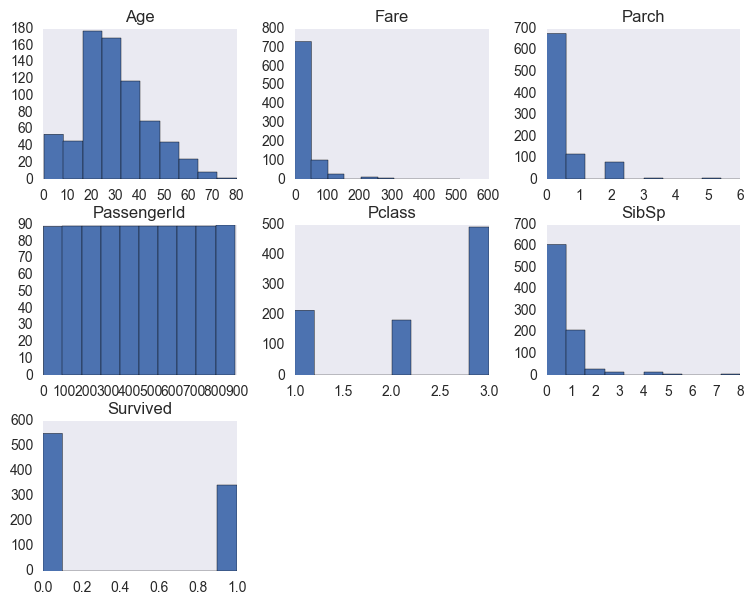

In [9]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)

plt.style.use="default"
titanic.hist(bins=10,figsize=(9,7),grid=False)

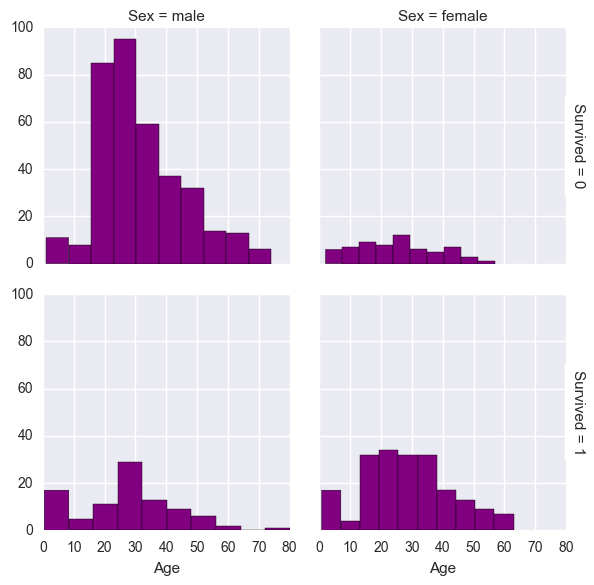

In [10]:
g=sns.FacetGrid(titanic,col="Sex",row="Survived",margin_titles=True)
g.map(plt.hist,"Age",color="purple")

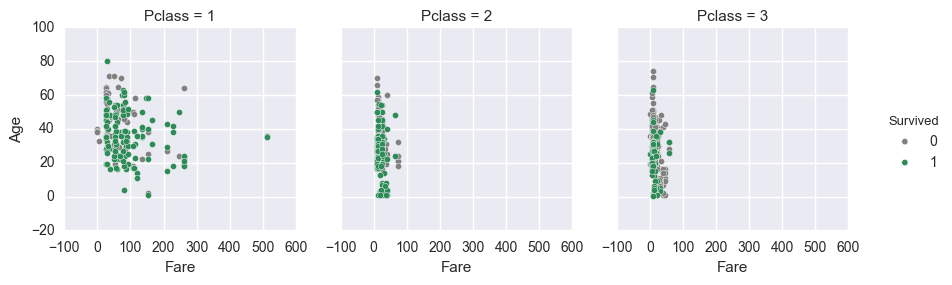

In [11]:
g=sns.FacetGrid(titanic,hue="Survived",col="Pclass",margin_titles=True,
                palette={1:"seagreen",0:"gray"})
g=g.map(plt.scatter,"Fare","Age",edgecolor="w").add_legend()

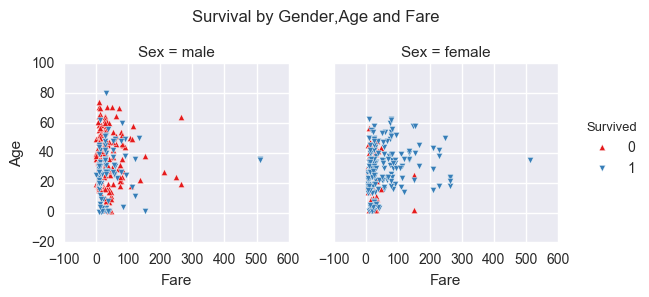

In [12]:
g=sns.FacetGrid(titanic,hue="Survived",col="Sex",margin_titles=True,
               palette="Set1",hue_kws=dict(marker=["^","v"]))
g.map(plt.scatter,"Fare","Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Survival by Gender,Age and Fare")

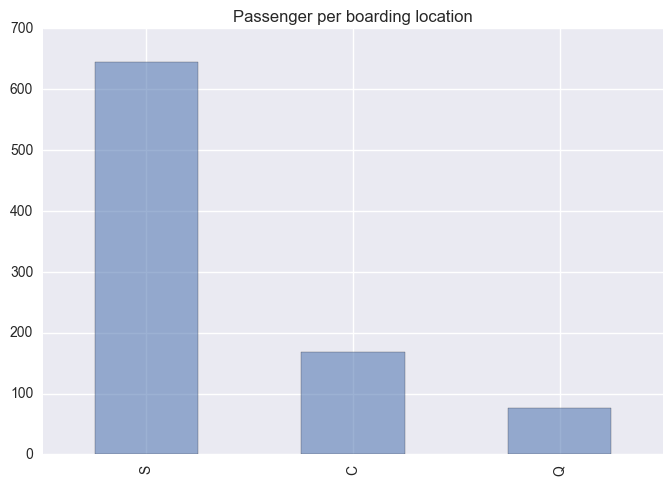

In [13]:
titanic.Embarked.value_counts().plot(kind="bar",alpha=0.55)
plt.title("Passenger per boarding location")

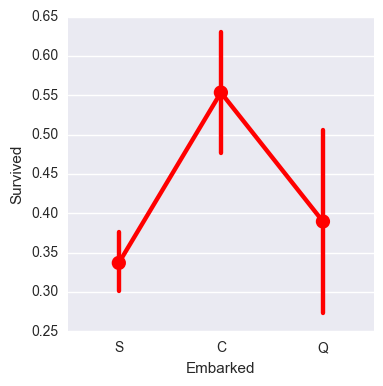

In [14]:
sns.factorplot(x="Embarked",y="Survived",data=titanic,color="r")

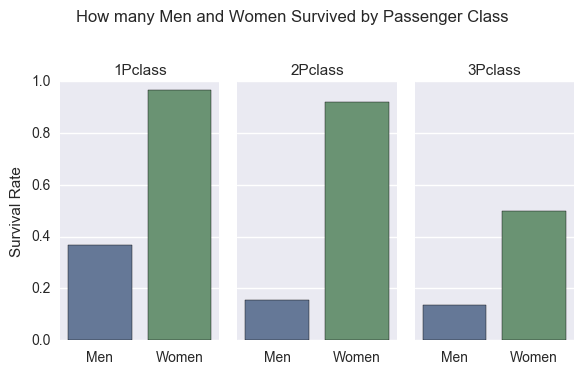

In [15]:
sns.set(font_scale=1)
g=sns.factorplot(x="Sex",y="Survived",col="Pclass",
                 data=titanic,saturation=.5,
                kind="bar",ci=None,aspect=.5)
(g.set_axis_labels("","Survival Rate")
     .set_xticklabels(["Men","Women"])
     .set_titles("{col_name}{col_var}")
     .set(ylim=(0,1)).despine(left=True))
plt.subplots_adjust(top=0.8)
g.fig.suptitle("How many Men and Women Survived by Passenger Class")

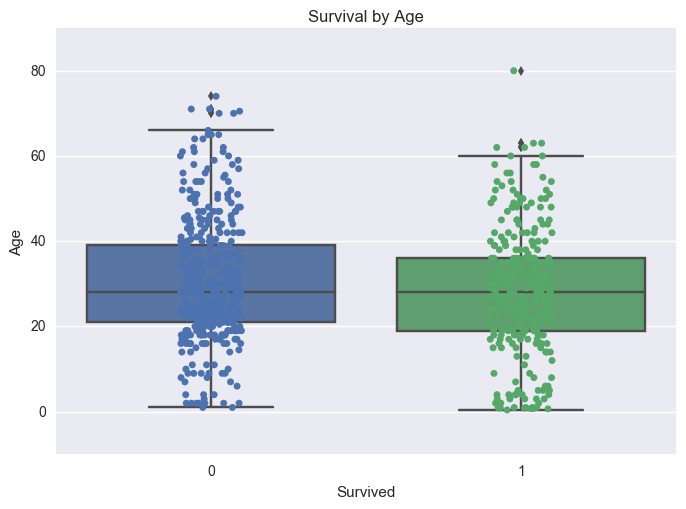

In [16]:
ax=sns.boxplot(x="Survived",y="Age",
              data=titanic)
ax=sns.stripplot(x="Survived",y="Age",
                data=titanic,jitter=True,
                edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12)

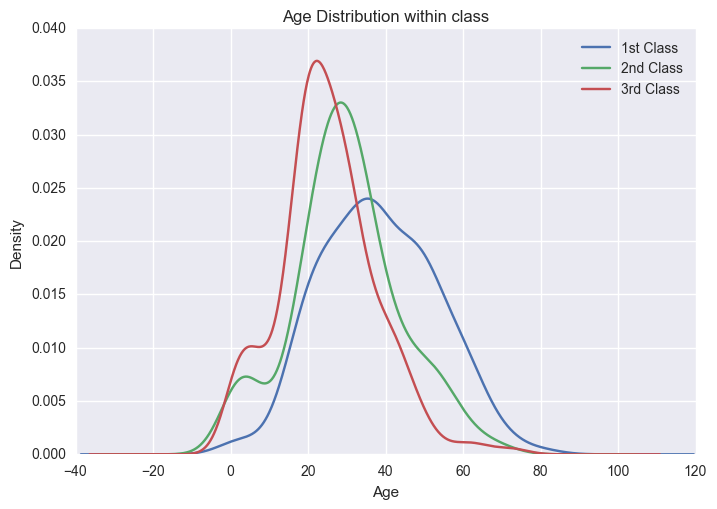

In [17]:
titanic.Age[titanic.Pclass==1].plot(kind="kde")
titanic.Age[titanic.Pclass==2].plot(kind="kde")
titanic.Age[titanic.Pclass==3].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within class")
plt.legend(("1st Class","2nd Class","3rd Class"),loc="best")

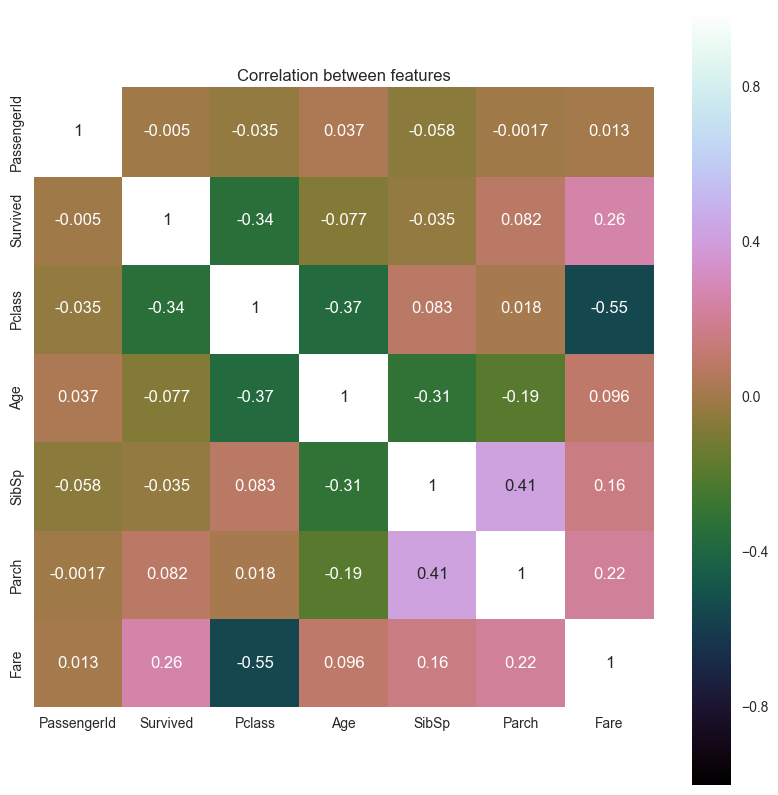

In [18]:
corr=titanic.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr,vmax=1,square=True,annot=True,cmap="cubehelix")
plt.title("Correlation between features")

In [19]:
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

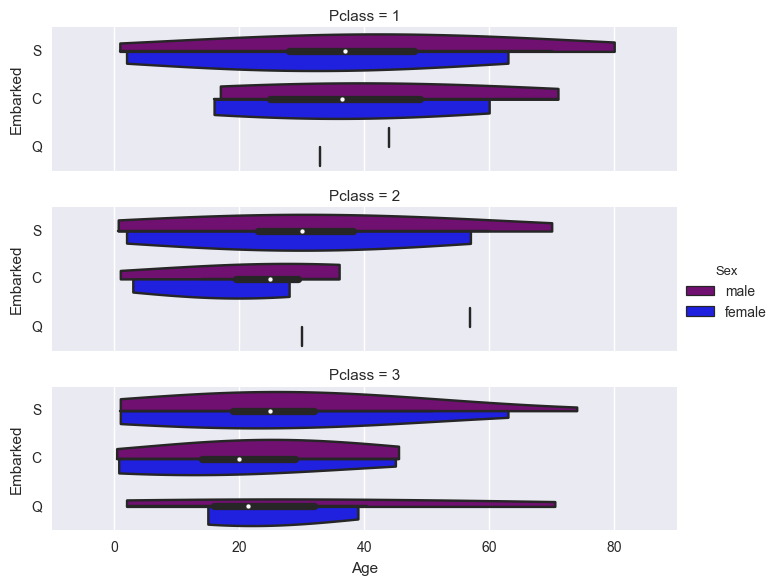

In [20]:
g=sns.factorplot(x="Age",y="Embarked",
                hue="Sex",row="Pclass",
                data=titanic[titanic.Embarked.notnull()],
                orient="h",size=2,aspect=3.5,
                palette={"male":"purple","female":"blue"},
                kind="violin",split=True,cut=0,bw=2)

In [21]:
#missing value imputation
#SVC无法处理缺失值，DT和RF可以很好地处理缺失值
#仅用均值或者中位数无法准确预测缺失值
titanic[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


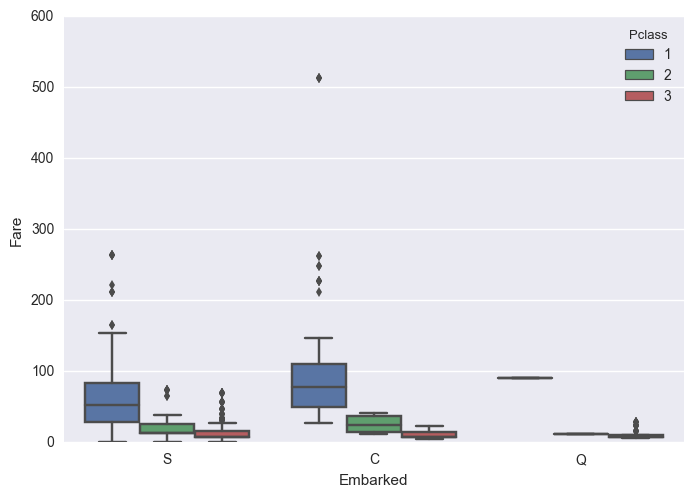

In [22]:
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=titanic)

In [23]:
titanic["Embarked"]=titanic["Embarked"].fillna("C")

In [24]:
titanic_test.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
titanic_test[titanic_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
def fill_missing_fare(df):
    median_fare=df[(df["Pclass"]==3)&(df["Embarked"]=="S")]["Fare"].median()
    df["Fare"]=df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

In [27]:
#Feature engineering
titanic["Deck"]=titanic.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

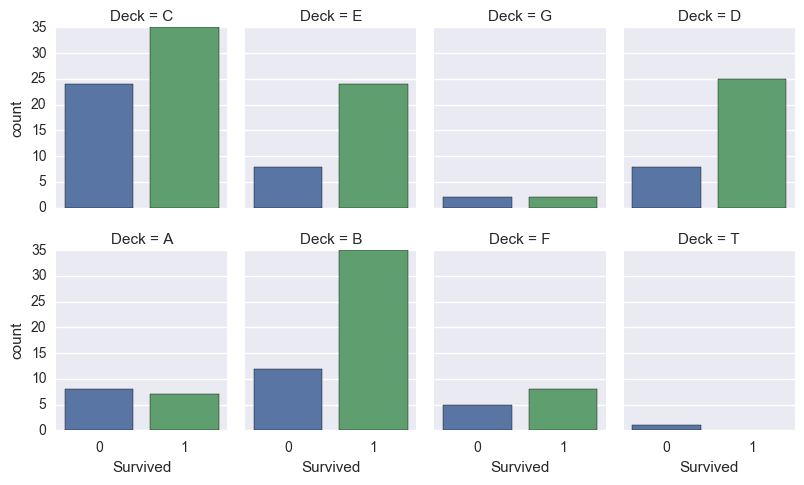

In [28]:
g=sns.factorplot("Survived",col="Deck",col_wrap=4,
                 data=titanic[titanic.Deck.notnull()],
                kind="count",size=2.5,aspect=.8)

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


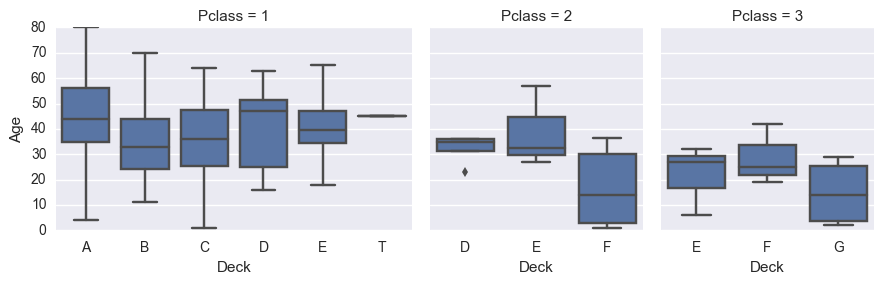

In [29]:
titanic=titanic.assign(Deck=titanic.Deck.astype(object)).sort("Deck")
g=sns.FacetGrid(titanic,col="Pclass",sharex=False,
              gridspec_kws={"width_ratios":[5,3,3]})
g.map(sns.boxplot,"Deck","Age")

In [30]:
titanic.Deck.fillna("Z",inplace=True)
titanic_test.Deck.fillna("Z",inplace=True)
titanic["Deck"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [31]:
titanic["FamilySize"]=titanic["SibSp"]+titanic["Parch"]+1
titanic_test["FamilySize"]=titanic_test["SibSp"]+titanic["Parch"]+1
titanic["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [32]:
titanic.loc[titanic["FamilySize"]==1,"FsizeD"]="singleton"
titanic.loc[(titanic["FamilySize"]>1)&(titanic["FamilySize"]<5),"FsizeD"]="small"
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'
titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
titanic["FsizeD"].unique(),titanic["FsizeD"].value_counts()

(array(['singleton', 'small', 'large'], dtype=object), singleton    537
 small        292
 large         62
 Name: FsizeD, dtype: int64)

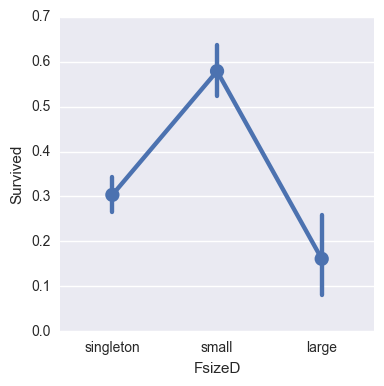

In [33]:
sns.factorplot(x="FsizeD",y="Survived",data=titanic)

[okay, short, good, long]
Categories (4, object): [short < okay < good < long]

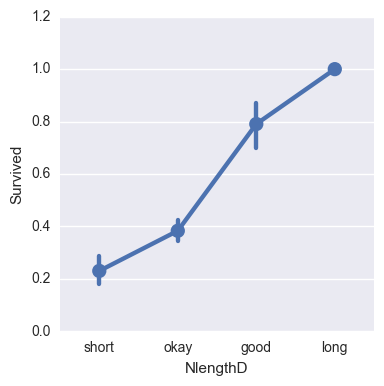

In [34]:
titanic["NameLength"]=titanic["Name"].apply(lambda x:len(x))
titanic_test["NameLength"]=titanic_test["Name"].apply(lambda x:len(x))

bins=[0,20,40,57,85]
group_names=["short","okay","good","long"]
titanic["NlengthD"]=pd.cut(titanic["NameLength"],bins,labels=group_names)

sns.factorplot(x="NlengthD",y="Survived",data=titanic)
titanic["NlengthD"].unique()

In [35]:
#featureing name
import re

def get_title(name):
    title_search=re.search("([A-Za-z]+)\.",name)
    if title_search:
        return title_search.group(1)
    return ""

titles=titanic["Name"].apply(get_title)
pd.value_counts(titles)

titanic["Title"]=titles
rare_title=['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
titanic.loc[titanic["Title"] == "Mlle", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Ms", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Mme", "Title"] = 'Mrs'
titanic.loc[titanic["Title"] == "Dona", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Lady", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Countess", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Capt", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Col", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Don", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Major", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Rev", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Sir", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Dr", "Title"] = 'Rare Title'

titanic["Title"].value_counts()

#Add in the title column.
titanic_test["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic_test.loc[titanic_test["Title"] == "Mlle", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Ms", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Mme", "Title"] = 'Mrs'
titanic_test.loc[titanic_test["Title"] == "Dona", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Lady", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Countess", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Capt", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Col", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Don", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Major", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Rev", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Sir", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Dr", "Title"] = 'Rare Title'

titanic_test["Title"].value_counts()

Mr            228
Miss          101
Mrs            59
Master         23
Rare Title      7
Name: Title, dtype: int64

In [36]:
#ticket columns
titanic["Ticket"].tail()
titanic["TicketNumber"]=titanic["Ticket"].str.extract("(\d{2,})",expand=True)
titanic["TicketNumber"]=titanic["TicketNumber"].apply(pd.to_numeric)

titanic_test["TicketNumber"]=titanic_test["Ticket"].str.extract("(\d{2,})",expand=True)
titanic_test["TicketNumber"]=titanic_test["TicketNumber"].apply(pd.to_numeric)


In [37]:
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,17,short,Mrs,NaN
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,1,singleton,24,okay,Mr,NaN


In [38]:
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(),inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(),inplace=True)

In [39]:
#convert categorical variables into Numberical ones
#LabelEncoder 用于将非数值标签转换为数值标签
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=["Embarked","Sex","Title","FsizeD","Deck"]
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])
    
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,2,0,1,1,27,okay,2,110465.0
174,175,0,1,"Smith, Mr. James Clinch",1,56.0,0,0,17764,30.6958,A7,0,0,1,1,23,okay,2,17764.0
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,A31,0,0,1,1,16,short,2,112277.0
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,2,0,3,2,25,okay,0,33638.0
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,0,0,1,1,35,okay,4,13213.0


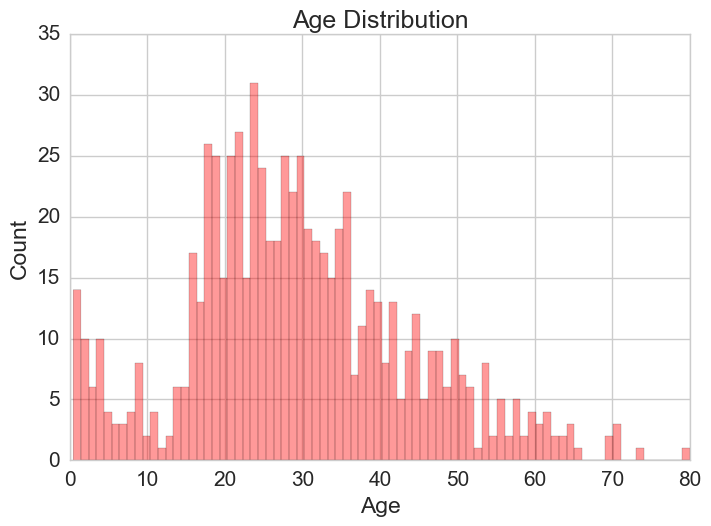

In [40]:
#age columns RandomForest algorithm to predict ages
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                bins=80,
                kde=False,
                color="red")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [41]:
#predicting missing values in using Random Forest
from sklearn.ensemble import RandomForestRegressor
def fill_missing_age(df):
    age_df=df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength','Deck']]
    
    train=age_df.loc[(df.Age.notnull())]
    test=age_df.loc[(df.Age.isnull())]
    
    y=train.values[:,0]
    x=train.values[:,1::]
    
    rtr=RandomForestRegressor(n_estimators=2000,n_jobs=-1)
    rtr.fit(x,y)
    
    predictedAges=rtr.predict(test.values[:,1::])
    
    df.loc[(df.Age.isnull()),"Age"]=predictedAges
    
    return df
    

In [42]:
titanic=fill_missing_age(titanic)
titanic_test=fill_missing_age(titanic_test)

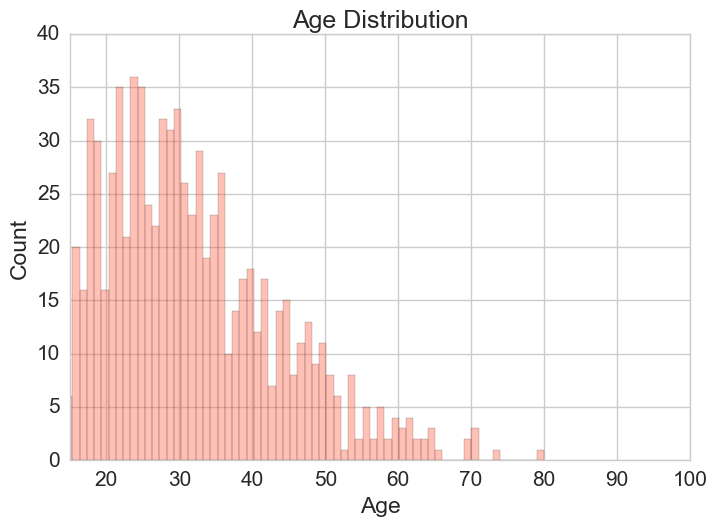

In [43]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"],
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [44]:
#feature scaling
#StandardScaler用于标准化数据集
from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit(titanic[["Age","Fare"]])
df_std=std_scale.transform(titanic[["Age","Fare"]])

std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
df_std = std_scale.transform(titanic_test[['Age', 'Fare']])

In [45]:
#correlation of features with target
titanic.corr()["Survived"]

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078449
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
Title          -0.071174
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [46]:
#predict survival
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked", "FsizeD", "Title","Deck"]
target="Survived"

alg=LinearRegression()

kf=KFold(titanic.shape[0],random_state=1)

predictions=[]

In [47]:
#iloc() 选取特定行列值，以行为主
for train,test in kf.split(titanic):
    train_predictions=titanic[predictors].iloc[train,:]
    train_target=titanic[target].iloc[train]
    
    alg.fit(train_predictions,train_target)
    
    test_predictions=alg.predict(titanic[predictors].iloc[test,:])
    
    predictions.append(test_predictions)

In [48]:
predictions=np.concatenate(predictions,axis=0)

predictions[predictions>.5]=1
predictions[predictions<=.5]=0

accuracy=sum(titanic["Survived"]==predictions)/titanic.shape[0]
accuracy

0.80808080808080807

In [49]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

lr=LogisticRegression(random_state=1)
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=50)
scores=cross_val_score(lr,titanic[predictors],titanic["Survived"],scoring="f1",cv=cv)
scores.mean()

0.73977057466436857

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_estimators=10,
                          min_samples_split=2,
                         min_samples_leaf=1)
kf=KFold(titanic.shape[0],random_state=1)
rf.fit(titanic[predictors],titanic["Survived"])
predictions=model_selection.cross_val_predict(rf,titanic[predictors],titanic["Survived"],cv=kf)
predictions=pd.Series(predictions)
scores=cross_val_score(rf,titanic[predictors],titanic["Survived"])
scores.mean()

0.76655443322109995

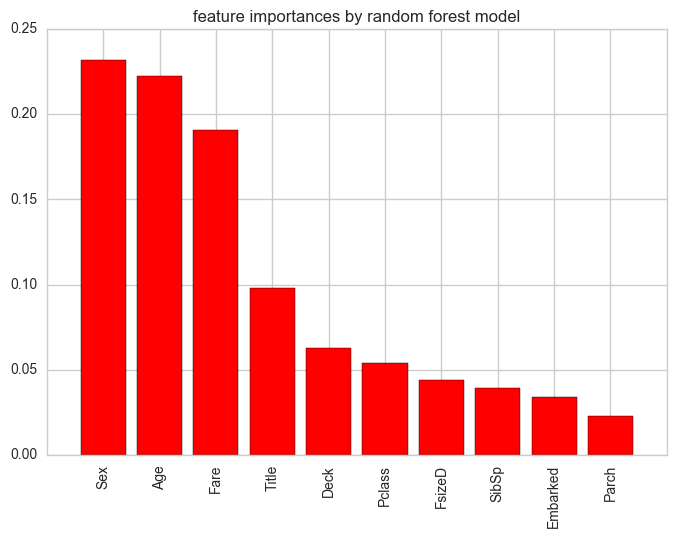

In [51]:
#import features
importances=rf.feature_importances_
std=np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices=np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure()
plt.title("feature importances by random forest model")
plt.bar(range(np.size(predictors)),importances[indices],color="r",
        yerr=std[indices],align="center")
plt.xticks(range(np.size(predictors)),sorted_important_features,rotation="vertical")

plt.xlim([-1,np.size(predictors)])
plt.show()

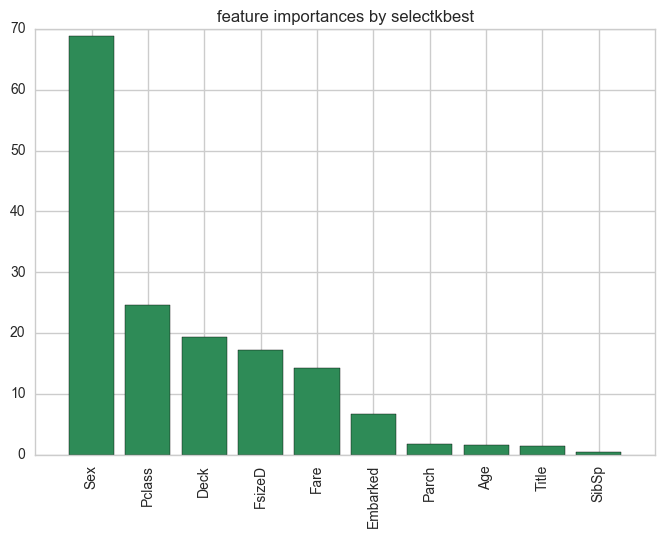

In [83]:
#feature_selection 包含单变量筛选算法和特征递归消除算法
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])

scores=-np.log10(selector.pvalues_)
#indices=np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
    
plt.figure()
plt.title("feature importances by selectkbest")
plt.bar(range(np.size(predictors)),scores[indices],color="seagreen",
        yerr=std[indices],align="center")
plt.xticks(range(np.size(predictors)),sorted_important_features,rotation="vertical")

plt.xlim([-1,np.size(predictors)])
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=50)
scores=cross_val_score(lr,titanic[predictors],titanic["Survived"],scoring="f1",cv=cv)
scores.mean()

0.73977057466436857

In [72]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(titanic[predictors],titanic["Survived"])
scores=cross_val_score(adb,titanic[predictors],titanic["Survived"],scoring="f1",cv=cv)
scores.mean()

0.75805830278040442

In [79]:
#Maximum voting ensemble and submission
from sklearn.ensemble import VotingClassifier
eclf1=VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('adb', adb)],voting="soft")
eclf1=eclf1.fit(titanic[predictors],titanic["Survived"])
predictions=eclf1.predict(titanic[predictors])
scores=cross_val_score(eclf1,titanic[predictors],titanic["Survived"],scoring="f1",cv=cv)
predictions
scores.mean()


0.76687759221561058

In [80]:
selector.fit_transform(titanic[predictors],titanic["Survived"])

array([[  1.    ,   1.    ,  52.    ,   1.    ,   0.    ],
       [  1.    ,   1.    ,  30.6958,   1.    ,   0.    ],
       [  1.    ,   1.    ,  31.    ,   1.    ,   0.    ],
       ..., 
       [  2.    ,   1.    ,  13.    ,   1.    ,   8.    ],
       [  3.    ,   0.    ,  23.45  ,   2.    ,   8.    ],
       [  3.    ,   1.    ,   7.75  ,   1.    ,   8.    ]])

In [82]:
predictors

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'FsizeD',
 'Title',
 'Deck']

In [85]:
scores

array([ 24.59567142,  68.85199425,   1.71713983,   0.5342545 ,
         1.82976043,  14.21323514,   6.77677063,  17.24236881,
         1.47300803,  19.40458149])